In [2]:
import pandas as pd

data = pd.read_csv('../Data/Processed/processed.csv')

In [3]:
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering, Birch, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture

methods = {
    "AC": AgglomerativeClustering(),
     "KMeans" : KMeans(), 
     "SC": SpectralClustering(), 
     "Birch": Birch(),
     "DBSCAN": DBSCAN(), 
     "MeanShift": MeanShift(),
}


In [4]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
silhouette_scores_per_method = []
iterations_per_method = 100

for index, method in enumerate(methods.values()):
    silhouette_scores_for_method = []
    for iteration in range(iterations_per_method): 
        prediction = method.fit_predict(X=data)
        sc = silhouette_score(data, prediction)
        silhouette_scores.append((index, sc))
        silhouette_scores_for_method.append(sc)
    silhouette_scores_per_method.append(silhouette_scores_for_method)





In [14]:
import numpy as np

silhouette_scores_all_x, silhouette_scores_all_y = zip(*silhouette_scores)
methods_x_axis = [i for i in range(len(silhouette_scores_per_method))]
silhouette_score_avg_per_method = [sum(scores)/len(scores) for scores in silhouette_scores_per_method]
silhouette_score_std_per_method = [np.std(scores) for scores in silhouette_scores_per_method]

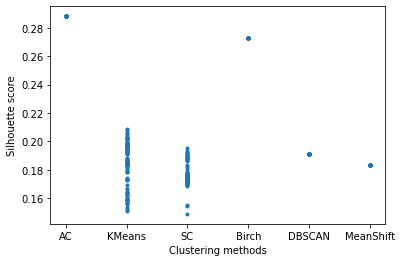

In [10]:
import matplotlib.pyplot as plt

plt.plot(silhouette_scores_all_x, silhouette_scores_all_y,'.')
plt.xlabel("Clustering methods")
plt.ylabel("Silhouette score")
plt.xticks([i for i in range(len(methods))],methods.keys())
plt.show()

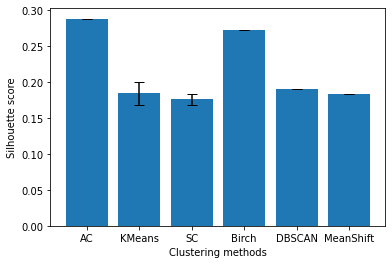

In [18]:


plt.bar(methods_x_axis, silhouette_score_avg_per_method, yerr=silhouette_score_std_per_method, capsize=5)
plt.xlabel("Clustering methods")
plt.ylabel("Silhouette score")
plt.xticks([i for i in range(len(methods))],methods.keys())
plt.show()